# An example of applying DQN to single intersection control

In [1]:
# to suppress all the annoying warnings from tensorflow
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

from aienvs.Sumo.GridSumoEnv import GridSumoEnv
from aiagents.single.DQN.DQNAgent import DQNAgent
import matplotlib.pyplot as plt

In [2]:
# build up a single intersection sceanrio
shape = (1,1)
env = GridSumoEnv({
    'shape': shape,
    'lane_length': 100,
    'car_tm': 100,
    'car_pr': 0.2,
    'resolutionInPixelsPerMeterX': 0.25,
    'resolutionInPixelsPerMeterY': 0.25,
    'gui': False
})

information about the environment:
agent id: l_1_1
action space: Discrete(2)
observation space: Box(50, 50)

an observation that the agent would get:


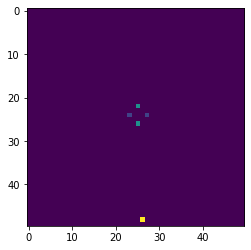

In [11]:
print("information about the environment:")
agent_id, action_space = list(env.action_space.spaces.items())[0]
print("agent id:", agent_id)
print("action space:", action_space)
print("observation space:", env.observation_space)

env.reset()
s, r, done, _ = env.step({agent_id: 0})
print("\nan observation that the agent would get:")
plt.imshow(s)
plt.show()

In [4]:
# build up a DQN agent 
agent = DQNAgent(
    agentId=agent_id,
    actionspace=action_space,
    observationspace=env.observation_space,
    parameters={
        'num_frames': 4, # the number of current and previous frames we stack as the input to the network
        'gamma': 0.99, # discount factor
        'learning_rate': 2.5e-4,
        'batch_size': 32,
        'train_frequency': 1,
        'epsilon': 0.1, # for epsilon-greedy policy during training 
        'double_dqn': True,
        'encoder_type': "large", # the size of the encoder used by the DQN network
        'memory_size': 5000,
        'freeze_interval': 5000
    }
)

Number of actions for agent l_1_1: 2
Building network...
Finished building network.


In [5]:
# Train the DQN agent in the environment

# turn on the training mode
agent.train() 
# train for 1000 episodes
num_episodes = 500
training_returns = []
for i_episode in range(num_episodes):
    obs = env.reset()
    done = False
    reward = None
    Return = 0.0
    while True:
        action = agent.step(observation=obs, reward=reward, done=done)
        obs, reward, done, _ = env.step(action)
        Return += reward
        if done:
            # send the final transition to the agent
            agent.step(observation=obs, reward=reward, done=done) 
            break
    print("Episode {} return: {}".format(i_episode, Return))
    training_returns.append(Return)

Episode 0 return: -2673.6139736249447
Episode 1 return: -4775.42288350498
Episode 2 return: -716.8004368211249
Episode 3 return: -1059.4027243486682
Episode 4 return: -771.5606504359067
Episode 5 return: -331.648220954737
Episode 6 return: -1391.8087265791837
Episode 7 return: -978.7867602095071
Episode 8 return: -1451.8601263937169
Episode 9 return: -342.20045798596925
Episode 10 return: -793.2807864857926
Episode 11 return: -2435.5899388463054
Episode 12 return: -592.8594212074087
Episode 13 return: -612.1927195217609
Episode 14 return: -342.8770707683832
Set target network to action network.
Episode 15 return: -893.5952047517131
Episode 16 return: -613.9140015104939
Episode 17 return: -560.3711646702307
Episode 18 return: -1126.3576397402776
Episode 19 return: -891.9265010393889
Episode 20 return: -233.87195488223722
Episode 21 return: -548.8848686122216
Episode 22 return: -1175.5424430701048
Episode 23 return: -297.20251118065596
Episode 24 return: -281.8197572789567
Episode 25 ret

Episode 206 return: -206.6688581583394
Episode 207 return: -437.1984676671072
Episode 208 return: -120.64922302617562
Episode 209 return: -295.24619714532884
Episode 210 return: -249.08205311417697
Episode 211 return: -273.18473748811175
Episode 212 return: -183.66326954801602
Episode 213 return: -547.1209646057089
Episode 214 return: -325.5166630893804
Episode 215 return: -165.28192313719117
Episode 216 return: -291.5780656297077
Episode 217 return: -362.6844104727719
Episode 218 return: -264.7787181442288
Episode 219 return: -518.8201085405772
Episode 220 return: -299.1980207112327
Episode 221 return: -175.81962566493218
Episode 222 return: -175.18909434012912
Episode 223 return: -324.26883531786973
Episode 224 return: -225.45721193768762
Set target network to action network.
Episode 225 return: -302.41607382042747
Episode 226 return: -322.98840249968276
Episode 227 return: -421.665442065403
Episode 228 return: -447.2184894687712
Episode 229 return: -282.91094213784487
Episode 230 re

Episode 409 return: -452.515463020352
Episode 410 return: -593.4680002369302
Set target network to action network.
Episode 411 return: -140.5917142811071
Episode 412 return: -240.93827205473556
Episode 413 return: -178.41034958697605
Episode 414 return: -277.5871290218654
Episode 415 return: -344.39562038767446
Episode 416 return: -532.9420143100398
Episode 417 return: -359.4533517712207
Episode 418 return: -335.4880043102681
Episode 419 return: -265.10301675687083
Episode 420 return: -326.7216156447291
Episode 421 return: -243.7262887997412
Episode 422 return: -317.4656859507889
Episode 423 return: -981.2984497566591
Episode 424 return: -157.28874631231878
Episode 425 return: -312.0366920197204
Episode 426 return: -287.29368717075636
Episode 427 return: -491.84788132790527
Episode 428 return: -154.37663873931942
Episode 429 return: -492.8359593905039
Episode 430 return: -244.89486240777458
Episode 431 return: -244.8500754493262
Episode 432 return: -474.825318839183
Episode 433 return:

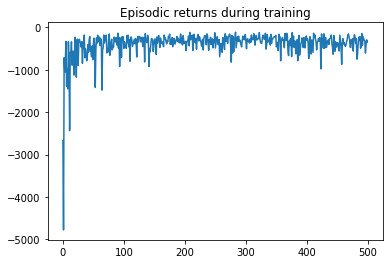

In [6]:
# Plot some statistics after training
plt.title("Episodic returns during training")
plt.plot(training_returns)
plt.show()

In [10]:
# Test the DQN agent

env._parameters['gui'] = True # turn on gui
agent.eval() # turn on evaluation mode

obs = env.reset()
done = False
reward = None
Return = 0.0
while True:
    action = agent.step(observation=obs, reward=reward, done=done)
    obs, reward, done, _ = env.step(action)
    Return += reward
    if done:
        agent.step(observation=obs, reward=reward, done=done) 
        break